# Physical Consistency Analysis of Feature Attributions

This analysis evaluates whether model attributions align with domain knowledge (expected physical signs). Specifically:

- A binary interpretability matrix visualizes for each model-feature pair whether the sign matches domain knowledge.
- Consistency scores quantify how often the attribution sign agrees with expected physical behavior across time.
- Heatmaps compare consistency scores across ML architectures.
- Threshold comparisons (e.g. 0.0, 0.1, 0.25) identify the best filtering strategy.
- Physically consistent features (score > 0.5) are listed per model.

These evaluations support transparent and physically grounded interpretation of model decisions.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Physical_Interpretability_0.0.csv", sep=";", index_col=0)
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df

,MLP,LSTM,GRU,RF,Transformer,GTN,TFT,CNN
d2m,0,1,1,0,1,0,0,0
lc_agriculture,0,0,0,0,0,1,0,1
lc_forest,0,0,0,1,1,1,1,1
lc_grassland,1,1,1,1,1,1,1,1
lc_settlement,1,0,0,1,0,0,0,0
lc_shrubland,0,0,0,0,0,0,0,0
lc_sparse_vegetation,0,0,0,1,0,0,0,0
lc_water_bodies,0,0,1,1,0,0,1,0
lc_wetland,0,0,0,0,0,0,0,0
lst_day,1,1,1,1,1,1,1,1


In [103]:
physical_knowledge = {
    "t2m": "+", "d2m": "-", "lc_agriculture": "+", "lc_forest": "+", "lc_grassland": "+",
    "lc_settlement": "-", "lc_shrubland": "+", "lc_sparse_vegetation": "+", "lc_water_bodies": "-",
    "lc_wetland": "-", "lst_day": "+", "lst_night": "+", "rh": "-", "roads_distance": "+", "slope": "+",
    "smi": "-", "ssrd": "+", "tp": "-", "wind_speed": "+"
}

In [104]:
df_plot = df.copy().astype(str).replace({"1.0": "Y", "0.0": "N", "1": "Y", "0": "N"}) #"1.0": "Y", "0.0": "N", "1": "Y", "0": "N"})
df_plot = df_plot.T  #.astype(str).replace({"0": "NL", "0.0": "NL"})
df_plot.loc["Physical-knowledge"] = [physical_knowledge.get(var, "") for var in df_plot.columns]

In [105]:
def get_color(val):
    return {
        "Y": "#f4a7b9",  # rosa
        "N": "#9ba4b5",  # grau
        "+": "#c1121f",  # rot
        "-": "#669bbc"   # blau
    }.get(val, "#ffffff")  # weiß fallback

colors = np.vectorize(get_color)(df_plot.values)

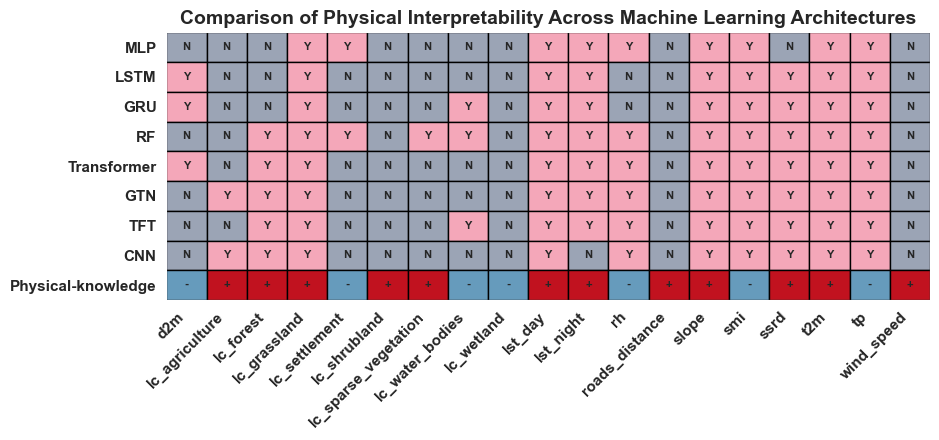

In [116]:
fig, ax = plt.subplots(figsize=(len(df_plot.columns)*0.5, len(df_plot)*0.5))  

for (i, j), val in np.ndenumerate(df_plot.values):
    ax.add_patch(plt.Rectangle((j, i), 1, 1, color=get_color(val), ec='black'))
    ax.text(j + 0.5, i + 0.5, val, ha='center', va='center', fontsize=8, fontweight='bold')

ax.set_xlim(0, len(df_plot.columns))
ax.set_ylim(0, len(df_plot.index))

ax.set_xticks(np.arange(len(df_plot.columns)) + 0.5)
ax.set_yticks(np.arange(len(df_plot.index)) + 0.5)
ax.set_xticklabels(df_plot.columns, rotation=45, ha='right', fontsize=11, fontweight='bold')
ax.set_yticklabels(df_plot.index, fontsize=11, fontweight='bold')

ax.invert_yaxis()
ax.set_title("Comparison of Physical Interpretability Across Machine Learning Architectures", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [23]:
model = "lstm"
path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/physical_consistency"
file = f"{model}_grouped_physical_consistency_0.0.csv"

In [27]:
path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/physical_consistency"
model_names = ['cnn', 'mlp', 'gru', 'lstm', 'transformer', 'gtn', 'tft']
data_dict = {}

for model in model_names:
    file = f"{model}_grouped_physical_consistency_0.0.csv"
    data_dict[model] = pd.read_csv(f"{path}/{file}")
print(data_dict.keys())

dict_keys(['cnn', 'mlp', 'gru', 'lstm', 'transformer', 'gtn', 'tft'])


In [25]:
df = pd.read_csv(f"{path}/{file}", sep=",")

In [26]:
df

,feature,physical_sign,n_considered,n_consistent,consistency_score
0,d2m,-,4107,1773,0.431702
1,lc_agriculture,+,4107,1732,0.421719
2,lc_forest,+,4107,2437,0.593377
3,lc_grassland,+,4107,2491,0.606525
4,lc_settlement,-,4107,2025,0.493061
5,lc_shrubland,+,4107,1225,0.298271
6,lc_sparse_vegetation,+,4107,1951,0.475043
7,lc_water_bodies,-,4107,2247,0.547115
8,lc_wetland,-,4107,2050,0.499148
9,lst_day,+,4095,3838,0.937241


In [91]:
import pandas as pd
import os

def merge_physical_consistency_scores(path, model_names, output_file="merged_consistency_scores.csv"):
    merged_df = None

    for model in model_names:
        file_path = os.path.join(path, f"{model}_grouped_physical_consistency_0.0.csv")
        df = pd.read_csv(file_path)

        df = df.rename(columns={"consistency_score": f"consistency_score_{model}"})

        if merged_df is None:
            merged_df = df[["feature", "physical_sign", f"consistency_score_{model}"]]
        else:
            merged_df = pd.merge(
                merged_df,
                df[["feature", "physical_sign", f"consistency_score_{model}"]],
                on=["feature", "physical_sign"],
                how="outer"
            )

    output_path = os.path.join(path, output_file)
    merged_df.to_csv(output_path, index=False)
    print(f"Merged file saved to: {output_path}")

merge_physical_consistency_scores(path, model_names)

✅ Merged file saved to: /Users/I566184/bachelorarbeit_coding/mesogeos/csv/physical_consistency/merged_consistency_scores.csv


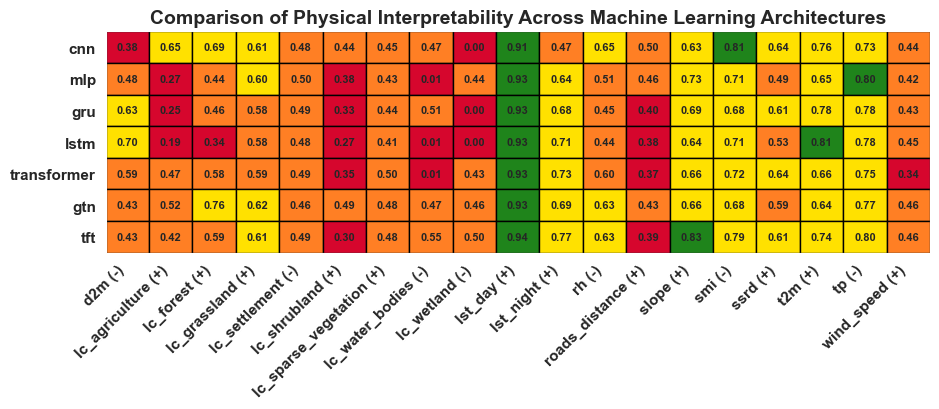

In [118]:
def plot_consistency_heatmap(df):
    df_plot = df.copy()
    df_plot.set_index(["feature", "physical_sign"], inplace=True)
    df_plot = df_plot.rename(columns=lambda col: col.replace("consistency_score_", ""))

    def get_color(val):
        if val > 0.8:
            return "#1F841B"  # green
        elif val > 0.6:
            return "#FFE100"  # yellow
        elif val > 0.4:
            return "#FF7F24"  # orange
        else:
            return "#D6062D"  # red

    df_plot = df_plot.T

    fig, ax = plt.subplots(figsize=(len(df_plot.columns) * 0.5, len(df_plot.index) * 0.6))

    for (i, j), val in np.ndenumerate(df_plot.values):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=get_color(val), ec='black'))
        ax.text(j + 0.5, i + 0.5, f"{val:.2f}", ha='center', va='center', fontsize=8, fontweight='bold')

    ax.set_xlim(0, len(df_plot.columns))
    ax.set_ylim(0, len(df_plot.index))

    ax.set_xticks(np.arange(len(df_plot.columns)) + 0.5)
    ax.set_yticks(np.arange(len(df_plot.index)) + 0.5)

    ax.set_xticklabels([f"{idx[0]} ({idx[1]})" for idx in df_plot.columns], rotation=45, ha='right', fontsize=11, fontweight='bold')
    ax.set_yticklabels(df_plot.index, fontsize=11, fontweight='bold')

    ax.invert_yaxis()
    ax.set_title("Comparison of Physical Interpretability Across Machine Learning Architectures", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/physical_consistency/merged_consistency_scores.csv")
plot_consistency_heatmap(df)


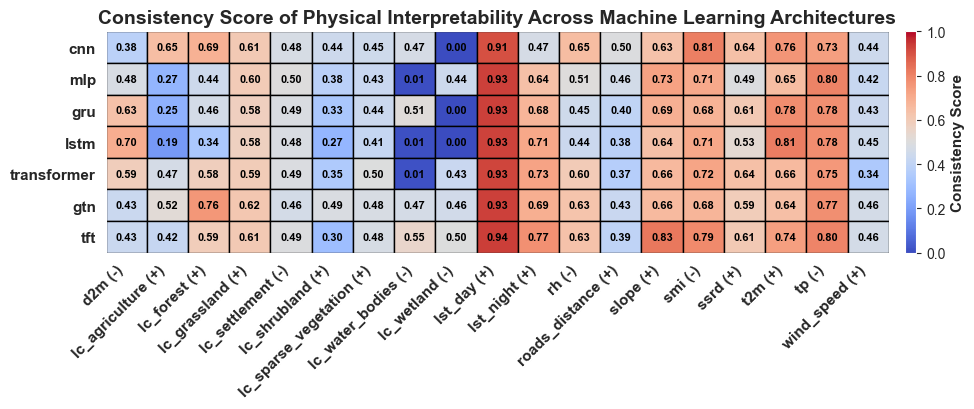

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

def plot_consistency_heatmap(df):
    df_plot = df.copy()
    df_plot.set_index(["feature", "physical_sign"], inplace=True)
    df_plot = df_plot.rename(columns=lambda col: col.replace("consistency_score_", ""))
    df_plot = df_plot.T  # Modelle als Zeilen

    cmap = plt.colormaps["coolwarm"]   # oder 'viridis', 'coolwarm', 'plasma'
    norm = mcolors.Normalize(vmin=0, vmax=1)  

    fig, ax = plt.subplots(figsize=(len(df_plot.columns) * 0.5, len(df_plot.index) * 0.6))

    for (i, j), val in np.ndenumerate(df_plot.values):
        color = cmap(norm(val))
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color, ec='black'))
        ax.text(j + 0.5, i + 0.5, f"{val:.2f}", ha='center', va='center', fontsize=8, fontweight='bold', color='black')

    ax.set_xlim(0, len(df_plot.columns))
    ax.set_ylim(0, len(df_plot.index))

    ax.set_xticks(np.arange(len(df_plot.columns)) + 0.5)
    ax.set_yticks(np.arange(len(df_plot.index)) + 0.5)

    ax.set_xticklabels([f"{idx[0]} ({idx[1]})" for idx in df_plot.columns], rotation=45, ha='right', fontsize=11, fontweight='bold')
    ax.set_yticklabels(df_plot.index, fontsize=11, fontweight='bold')

    ax.invert_yaxis()
    ax.set_title("Consistency Score of Physical Interpretability Across Machine Learning Architectures", fontsize=14, fontweight='bold')
    plt.tight_layout()

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.02)
    cbar.set_label("Consistency Score", fontsize=11, fontweight='bold')

    plt.show()

df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/physical_consistency/merged_consistency_scores.csv")
plot_consistency_heatmap(df)

In [18]:
def compare_consistency_thresholds(model: str):
    files = {
        "0.0": f"{model}_grouped_physical_consistency_0.0.csv",
        "0.1": f"{model}_grouped_physical_consistency_0.1.csv",
        "0.25": f"{model}_grouped_physical_consistency_0.25.csv",
        "default": f"{model}_grouped_physical_consistency.csv",
    }

    summary = {}

    for label, filename in files.items():
        full_path = os.path.join(path, filename)
        if not os.path.exists(full_path):
            print(f" File not found: {filename}")
            continue

        df = pd.read_csv(full_path)
        count_above_05 = (df["consistency_score"] > 0.5).sum()
        total = len(df)
        ratio = count_above_05 / total if total > 0 else 0.0

        summary[label] = {
            "filename": filename,
            "n_features": total,
            "n_above_0.5": count_above_05,
            "ratio_above_0.5": ratio,
        }

    best_key = max(summary, key=lambda k: summary[k]["ratio_above_0.5"])
    best_entry = summary[best_key]

    print("\n Comparison of Physical Consistency Scores:")
    for key, entry in summary.items():
        print(f"- Schwelle {key}: {entry['n_above_0.5']}/{entry['n_features']} > 0.5 "
              f"({entry['ratio_above_0.5']:.2%}) – Datei: {entry['filename']}")

    print(f"\n best value: '{best_key}' mit {best_entry['ratio_above_0.5']:.2%} über 0.5")

In [83]:
def get_physically_consistent_features(model: str, threshold: float = 0.5):
    file = f"{model}_grouped_physical_consistency_0.0.csv"
    full_path = os.path.join(path, file)

    df = pd.read_csv(full_path)
    consistent_feats = df[df["consistency_score"] > threshold]["feature"].tolist()

    print(f"✅ Physically consistent features for model '{model}' (score > {threshold}):")
    for feat in consistent_feats:
        print(f"- {feat}")

    print(f"\nTotal consistent features: {len(consistent_feats)}")

In [114]:
model= ("lstm")
compare_consistency_thresholds(model)
get_physically_consistent_features(model, threshold=0.5)


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 9/19 > 0.5 (47.37%) – Datei: lstm_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 10/19 > 0.5 (52.63%) – Datei: lstm_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 11/19 > 0.5 (57.89%) – Datei: lstm_grouped_physical_consistency_0.25.csv
- Schwelle default: 11/19 > 0.5 (57.89%) – Datei: lstm_grouped_physical_consistency.csv

✅ Beste Schwelle: '0.25' mit 57.89% über 0.5
✅ Physically consistent features for model 'lstm' (score > 0.5):
- d2m
- lc_grassland
- lst_day
- lst_night
- slope
- smi
- ssrd
- t2m
- tp

Total consistent features: 9


In [82]:
compare_consistency_thresholds("gru")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 10/19 > 0.5 (52.63%) – Datei: gru_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 10/19 > 0.5 (52.63%) – Datei: gru_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency_0.25.csv
- Schwelle default: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency.csv

✅ Beste Schwelle: '0.25' mit 57.89% über 0.5


In [72]:
compare_consistency_thresholds("mlp")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 9/19 > 0.5 (47.37%) – Datei: mlp_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 9/19 > 0.5 (47.37%) – Datei: mlp_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 9/19 > 0.5 (47.37%) – Datei: mlp_grouped_physical_consistency_0.25.csv
- Schwelle default: 9/19 > 0.5 (47.37%) – Datei: mlp_grouped_physical_consistency.csv
- Schwelle quantile: 8/19 > 0.5 (42.11%) – Datei: mlp_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.0' mit 47.37% über 0.5


In [74]:
compare_consistency_thresholds("transformer")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 11/19 > 0.5 (57.89%) – Datei: transformer_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 12/19 > 0.5 (63.16%) – Datei: transformer_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 12/19 > 0.5 (63.16%) – Datei: transformer_grouped_physical_consistency_0.25.csv
- Schwelle default: 12/19 > 0.5 (63.16%) – Datei: transformer_grouped_physical_consistency.csv

✅ Beste Schwelle: '0.1' mit 63.16% über 0.5


In [67]:
compare_consistency_thresholds("gru")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 10/19 > 0.5 (52.63%) – Datei: gru_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 10/19 > 0.5 (52.63%) – Datei: gru_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency_0.25.csv
- Schwelle default: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency.csv
- Schwelle quantile: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.25' mit 57.89% über 0.5


In [70]:
compare_consistency_thresholds("gtn")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 11/19 > 0.5 (57.89%) – Datei: gtn_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 12/19 > 0.5 (63.16%) – Datei: gtn_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 13/19 > 0.5 (68.42%) – Datei: gtn_grouped_physical_consistency_0.25.csv
- Schwelle default: 13/19 > 0.5 (68.42%) – Datei: gtn_grouped_physical_consistency.csv
- Schwelle quantile: 12/19 > 0.5 (63.16%) – Datei: gtn_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.25' mit 68.42% über 0.5


In [68]:
compare_consistency_thresholds("tft")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 11/19 > 0.5 (57.89%) – Datei: tft_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 11/19 > 0.5 (57.89%) – Datei: tft_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 12/19 > 0.5 (63.16%) – Datei: tft_grouped_physical_consistency_0.25.csv
- Schwelle default: 12/19 > 0.5 (63.16%) – Datei: tft_grouped_physical_consistency.csv
- Schwelle quantile: 12/19 > 0.5 (63.16%) – Datei: tft_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.25' mit 63.16% über 0.5


In [69]:
compare_consistency_thresholds("rf")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 13/19 > 0.5 (68.42%) – Datei: rf_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 13/19 > 0.5 (68.42%) – Datei: rf_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 13/19 > 0.5 (68.42%) – Datei: rf_grouped_physical_consistency_0.25.csv
- Schwelle default: 12/19 > 0.5 (63.16%) – Datei: rf_grouped_physical_consistency.csv
- Schwelle quantile: 12/19 > 0.5 (63.16%) – Datei: rf_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.0' mit 68.42% über 0.5
